![image alt <](Images/numgrade-bigger.jpg)
![](Images/pandas_logo.png)

# pandas plot : représentation graphique avec pandas

Pandas empaquette de nombreuses fonctions matplotlib, permettant ainsi de tracer rapidement et facilement les données issues des *Series* et *DataFrames*. Pandas va utiliser une notation assez proche de celle employée par matplotlib. Et comme toutes les données sont groupées dans un seul *DataFrame*, pandas offrira l'avantage de pouvoir appeler facilement différentes méthodes pour visualiser les données. 

Pour tracer les données avec pandas, nous importerons souvent matplotlib, ce qui nous permettra d'améliorer le rendu.

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')

![image alt >](Images/numgrade.png)
## Basic plotting with *plot*

In [15]:
import numpy as np
import pandas as pd

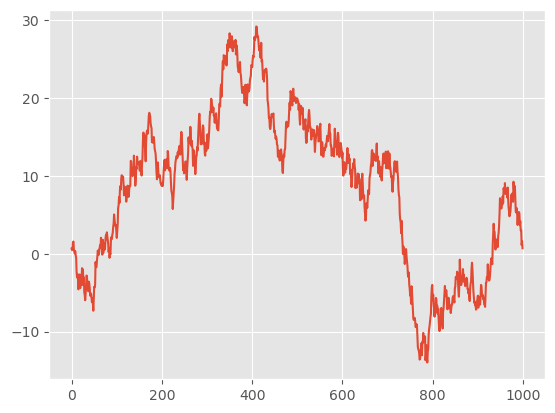

In [16]:
ts = pd.Series(np.random.randn(1000))
ts.cumsum().plot();

![image alt >](Images/numgrade.png)
Avec un *DataFrame*

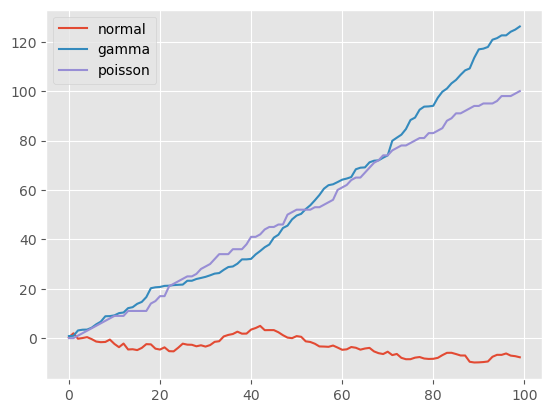

In [17]:
df = pd.DataFrame(
    {
        'normal': np.random.normal(size=100), 
        'gamma': np.random.gamma(1, size=100), 
        'poisson': np.random.poisson(size=100),
    }
)
df.cumsum('index').plot();

![image alt >](Images/numgrade.png)
Vous pouvez tracer les données d'une colonne en fonction d'une autre en utilisant les options x et y dans *plot()* :

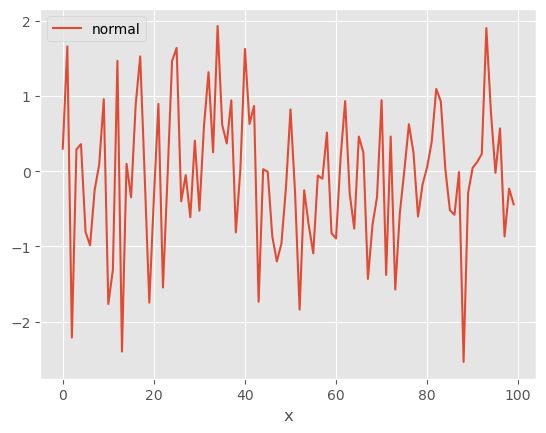

In [18]:
df['x'] = pd.Series(list(range(len(df))))
df.plot(x='x', y='normal');

![image alt >](Images/numgrade.png)
Vous pouvez également appeler l'option *subplots* :

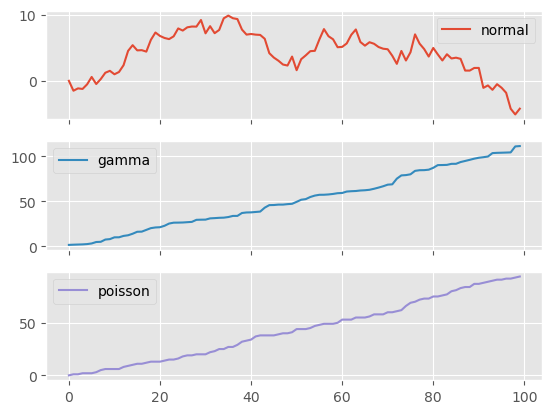

In [19]:
df = pd.DataFrame(
    {
        'normal': np.random.normal(size=100), 
        'gamma': np.random.gamma(1, size=100), 
        'poisson': np.random.poisson(size=100),
    }
)
df.cumsum('index').plot(subplots=True);

![image alt >](Images/numgrade.png)
Si jamais vous avez besoin de contrôler plus finement le rendu des graphiques, vous pouvez appeler la méthode *subplots* de matplotlib directement :

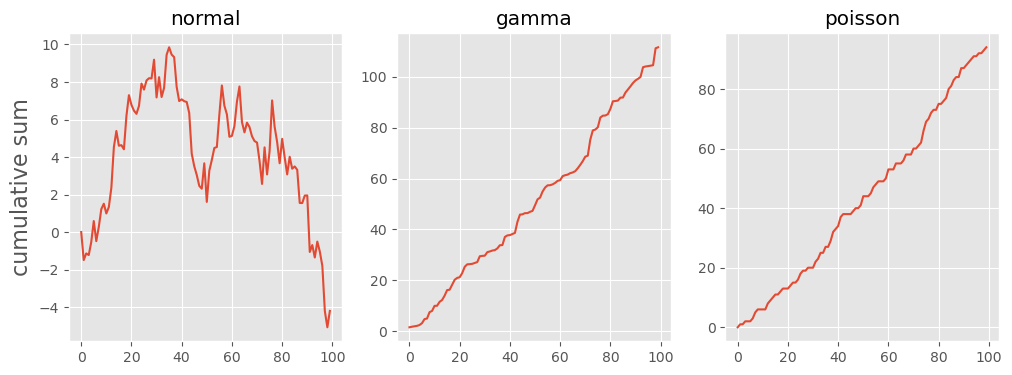

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, var in enumerate(['normal', 'gamma', 'poisson']):
    df[var].cumsum(0).plot(ax=ax[i], title=var)
ax[0].set_ylabel('cumulative sum', size=16);

![image alt >](Images/numgrade.png)
## Diagramme en bâtons (bar plot)

Les diagrammes en bâtons sont intéressants pour comparer des quantités mesurables pour des données discrètes :

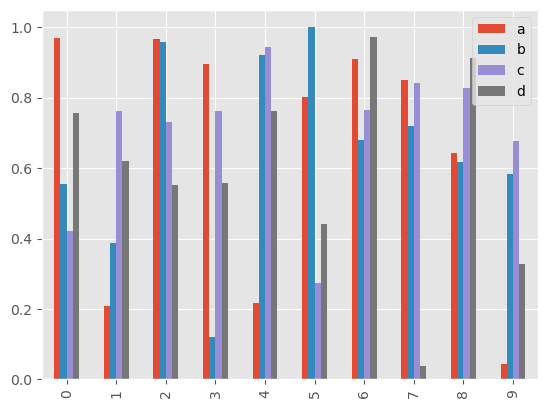

In [21]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.bar();

![image alt >](Images/numgrade.png)
Vous pouvez empiler les quantités avec l'option *stacked* :

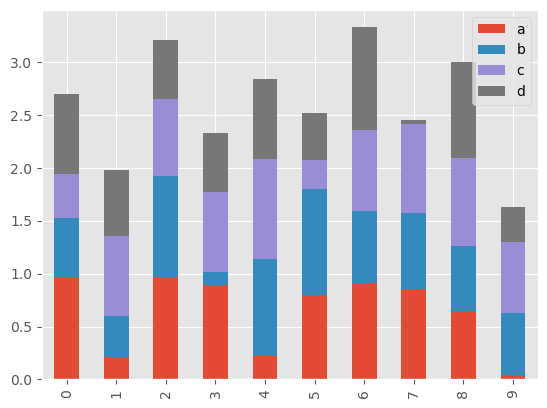

In [22]:
df.plot.bar(stacked=True);

![image alt >](Images/numgrade.png)
Pour représenter les diagrammes en bâtons horizontalement, il suffira d'utiliser la méthode *barh( )* :

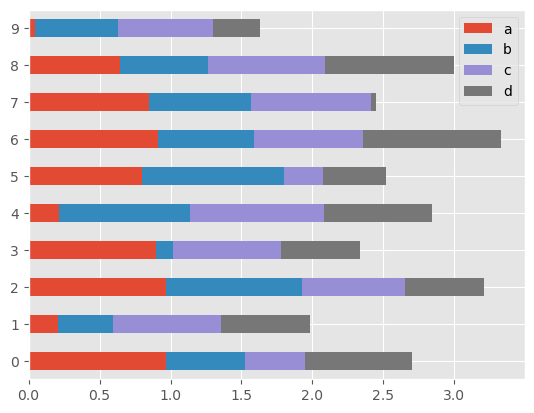

In [23]:
df.plot.barh(stacked=True);

![image alt >](Images/numgrade.png)
## Histogramme

Les histogrammes seront appropriés pour étudier la distribution des données.

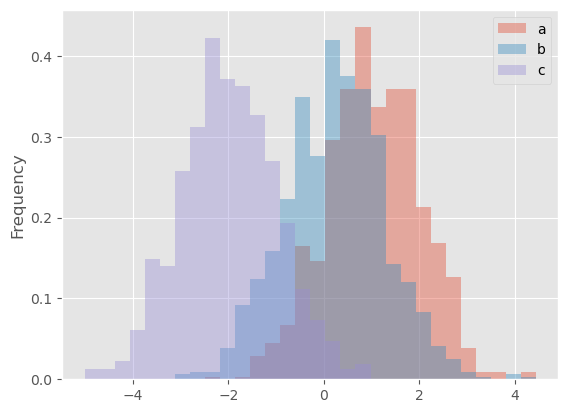

In [12]:
df = pd.DataFrame(
    {
        'a': np.random.randn(1000) + 1, 
        'b': np.random.randn(1000)+0.2, 
        'c': np.random.randn(1000) - 2,
    }, 
    columns=['a', 'b', 'c'],
)
df.plot.hist(bins=30, alpha=0.4, density=True);

![image alt >](Images/numgrade.png)
## Boîte à moustaches (box plot)

Rectangle allant du premier quartile au troisième quartile et coupé par la médiane, il est prolongé de 2 segments aux extrémités menant jusqu'aux valeurs extrêmes.

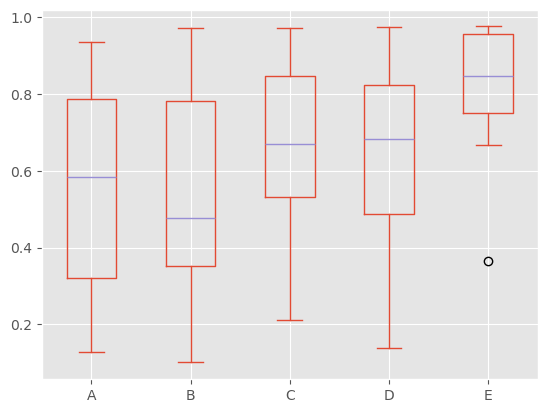

In [25]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box();

![image alt >](Images/numgrade.png)
## Nuage de points (scatter plot)

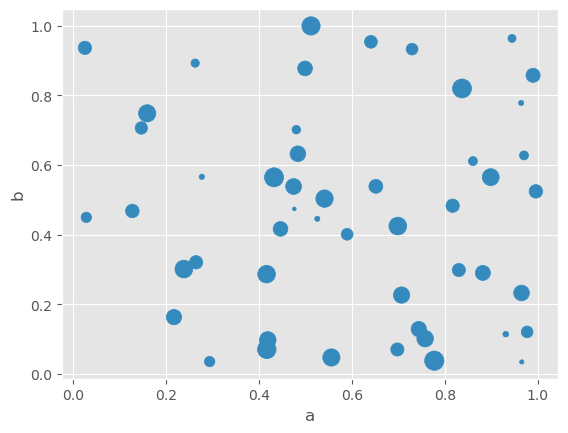

In [26]:
df = pd.DataFrame(np.random.rand(50, 3), columns=['a', 'b', 'c'])
df.plot.scatter(x='a', y='b', s=df['c']*200);   
#'3d plot': a is along x-axis, b is along y-axis and 
# c in function of the size of the points 

![image alt >](Images/numgrade.png)
## Diagramme circulaire (pie plot)

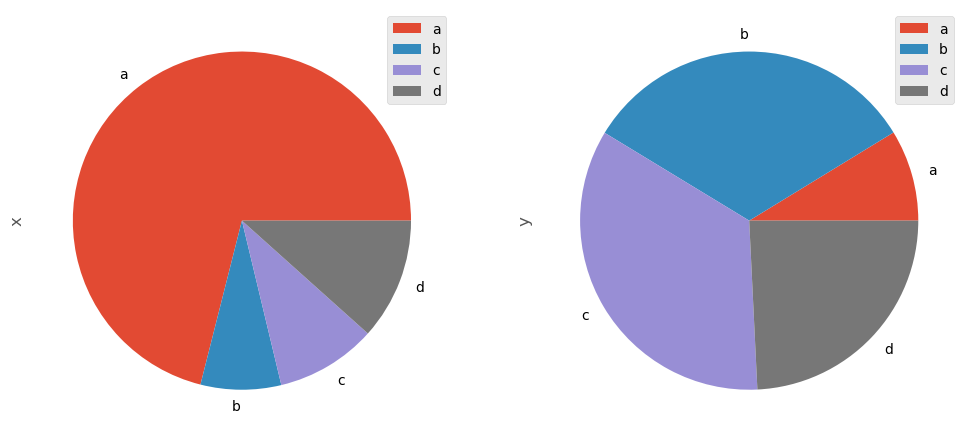

In [27]:
df = pd.DataFrame(
    3 * np.random.rand(4, 2), 
    index=['a', 'b', 'c', 'd'], 
    columns=['x', 'y'],
)
df.plot.pie(subplots=True, figsize=(12, 6));

Nous venons de voir un aperçu des possibilités de représentation graphique avec matplotlib et pandas. De nombreuses autres options sont disponibles. Vous trouverez la liste complète des possibilités offertes par pandas à cette adresse : [https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization). 

![image alt >](Images/numgrade.png)
### Exercice (difficulté : ⭐⭐⭐) 

**Objectifs pédagogiques** :

- Réaliser un graphique en suivant toutes les étapes : récupérer des données dans un DataFrame pandas, extraire les données intéressantes, réaliser le tracé

- Améliorer le tracé en cherchant les bonnes fonctions (en s'inspirant de la gallerie sur le site internet de matplotlib)

**Énoncé**

À partir du jeu de données de l'ONU (https://esa.un.org/unpd/wpp/Download/Standard/Population/ - fichier excel "WPP2017_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx") :

Extraire l'évolution de la population par continent dans un *DataFrame*.

Tracer le graphique. Vous devriez obtenir quelque chose comme ceci :

![image](Images/population_raw.png)

Améliorer le graphique précédent pour obtenir :

![image](Images/population_numgrade.png)

#### Exercice bonus : matplotlib et le widget interact

À partir de l'exercice sur le calcul des dérivées numériques (partie NumPy), utiliser le widget interact pour tracer la tangente à la courbe en différents points.

Rappel : 

-- équation de la tangente au point $a$ : $y = f(a) + f'(a) (x - a)$